Accuracy: 1.00


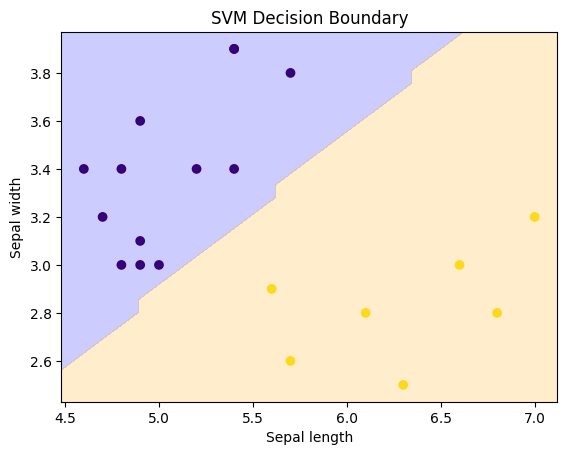

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 2, :2]
y = y[y != 2]

y = np.where(y == 0, -1, 1)

np.random.seed(1)
shuffle_idx = np.random.permutation(len(y))
X, y = X[shuffle_idx], y[shuffle_idx]
split_idx = int(0.8 * len(y))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        y_ = np.where(y <= 0, -1, 1)

        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):

                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

svm = SVM()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                         np.linspace(ylim[0], ylim[1], 30))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], colors=['blue', 'orange', 'blue'], linestyles=['--', '-', '--'])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, svm)
